# Tema 1 #

In [323]:
import matplotlib.pyplot as plt
import numpy as np

In [324]:
def modelo_malthus(x0, r, n):
  """
  Implementa el modelo de crecimiento económico.

  Argumentos:
    x0 (int): Población inicial.
    r (float): Tasa de crecimiento anual.
    n (int): Número de iteraciones.

  Retorna:
    list: Lista con la población en cada iteración.
  """
  poblacion = []
  for i in range(n + 1):
    poblacion.append(x0 * (r) ** i)
  return poblacion

def graficar_modelo_malthus(x0, r, n):
  """
  Calcula y grafica el modelo Economico.

  Argumentos:
    x0 (int): Población inicial.
    r (float): Tasa de crecimiento anual.
    n (int): Número de iteraciones.
  """
  poblacion = modelo_malthus(x0, r, n)

  plt.figure(figsize=(10, 6))
  plt.bar(range(n + 1), poblacion)
  plt.xlabel("Iteración")
  plt.ylabel("Población")
  plt.title(f"Crecimiento Economico (x0={x0}, r={r}, n={n})")
  plt.show()



## Ejercicio 1 (Depósito Capital) ## 


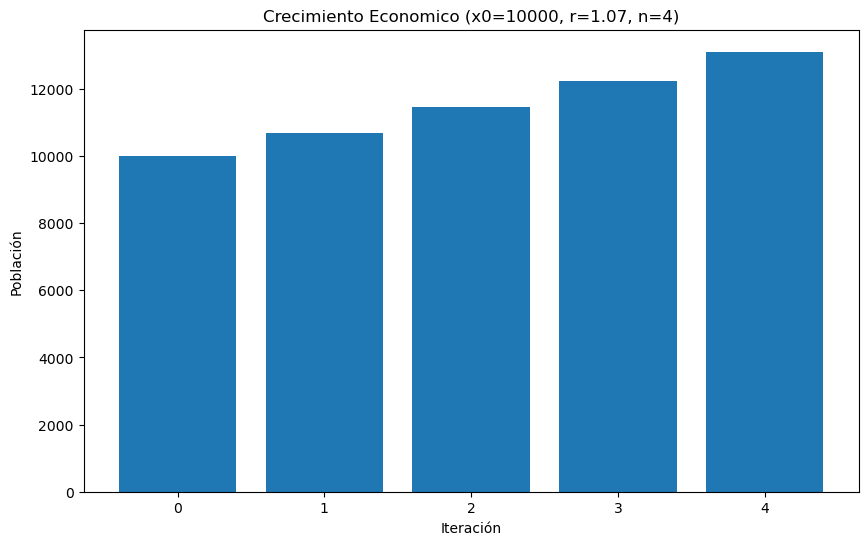

[10000.0, 10700.0, 11449.0, 12250.43, 13107.960100000002]


In [325]:
# Ejemplo de uso en modelo económico

x0 = 10000
r = 1.07 # Interes
n = 4

graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))



## Ejercicio 2 (Explosión Demográfica) ## 

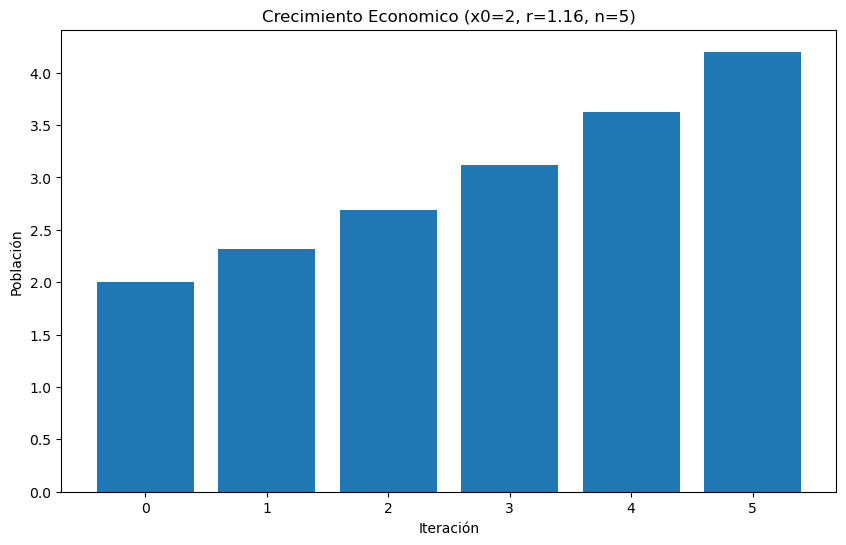

[2.0, 2.32, 2.6912, 3.1217919999999992, 3.621278719999999, 4.200683315199998]


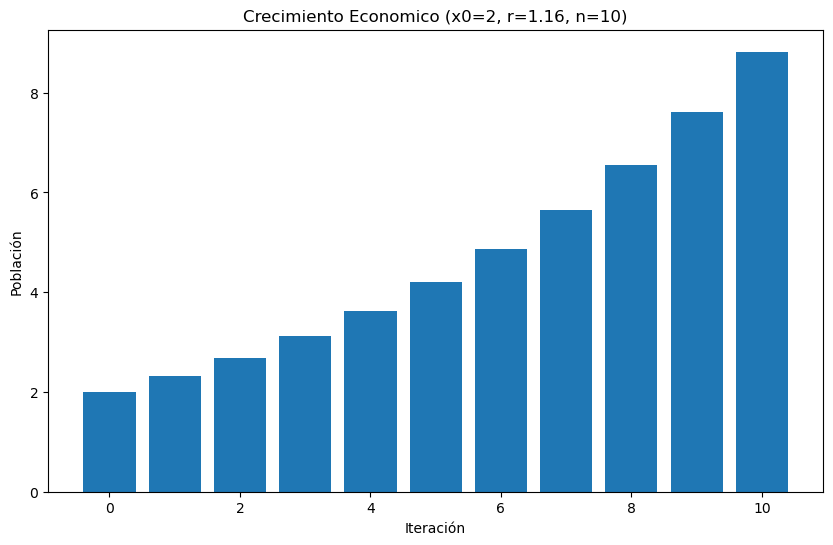

[2.0, 2.32, 2.6912, 3.1217919999999992, 3.621278719999999, 4.200683315199998, 4.872792645631998, 5.652439468933117, 6.5568297839624154, 7.605922549396402, 8.822870157299825]


In [326]:

x0 = 2
r = 1.16
n = 5 # Tras 5 iteraciones se duplica

graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))

x0 = 2
r = 1.16
n = 10 # Tras 5 iteraciones se cuadriplica
graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))

## Ejercicio 3 (Eliminación Farmaco Sangre) ## 

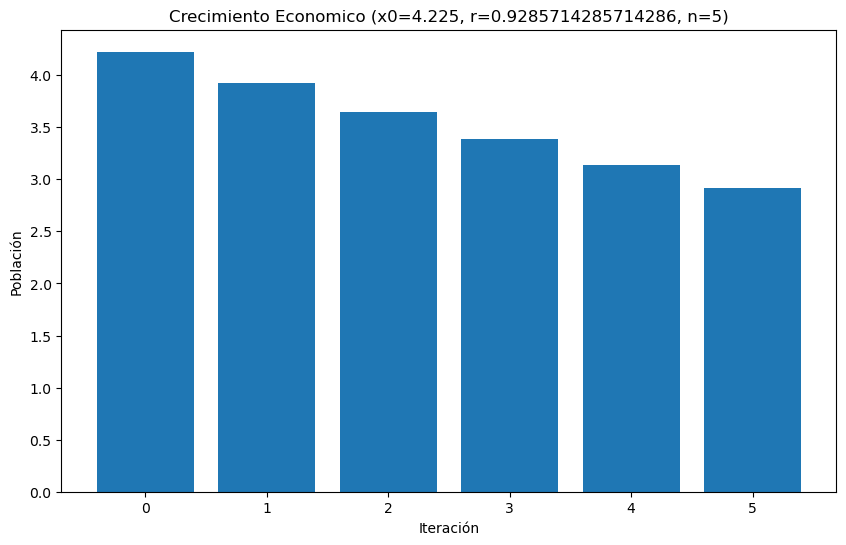

[4.225, 3.9232142857142853, 3.6429846938775508, 3.382771501457726, 3.141144965639317, 2.9167774680936516]


In [327]:
x0 = 4.225
r = 13/14
n = 5 # Tras 5 iteraciones se duplica

graficar_modelo_malthus(x0, r, n)
print(modelo_malthus(x0, r, n))


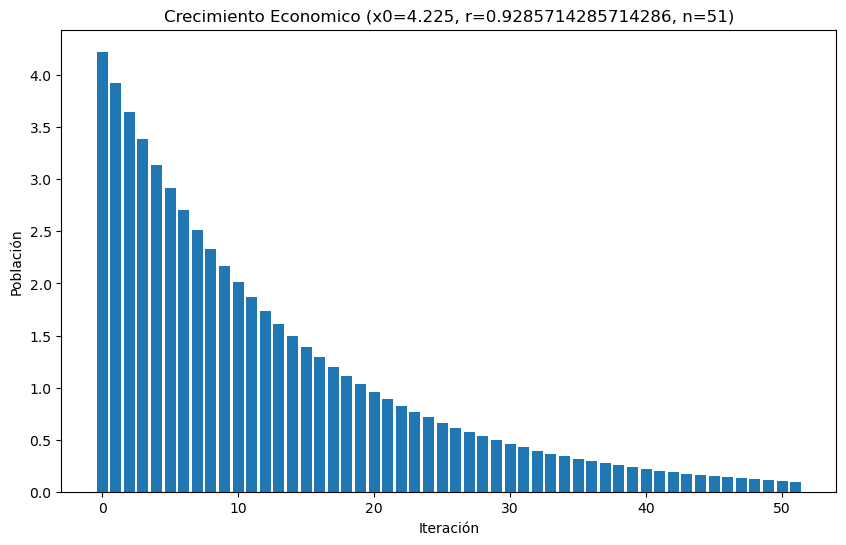


4.225 3.9232142857142853 3.6429846938775508 3.382771501457726 3.141144965639317 
2.9167774680936516 2.708436220372677 2.514976490346057 2.3353353124641956 2.168525647288182 
2.013630958196169 1.8698001754678713 1.7362430200773091 1.6122256615003585 1.4970666856789043 
1.390133350987554 1.2908381116313004 1.1986353893719217 1.113018575845356 1.033517248999259 
0.9596945883564549 0.8911449749024225 0.8274917624093924 0.7683852079515787 0.7135005502407515 
0.662536225223555 0.6152122091361583 0.571268479912147 0.5304635884898509 0.4925733321691472 
0.4573895227284938 0.4247188425336014 0.39438178235262994 0.3662116550417278 0.3400536796816044 
0.3157641311329184 0.29320955033770996 0.2722660110278735 0.2528184388115968 0.23475997889648278 
0.21799140897530547 0.20242059404849794 0.18796198018789095 0.17453612446018446 0.16206925842731412 
0.15049288282536313 0.13974339119498005 0.12976172039533862 0.12049302608138587 0.1118863813612869 
0.10389449697833783 0.09647346147988513 

In [328]:
x0 = 4.225
r = 13/14
n = 51 

graficar_modelo_malthus(x0, r, n)
# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")

  

## Ejercicio 4 (Desintegración Carbono-14) ## 

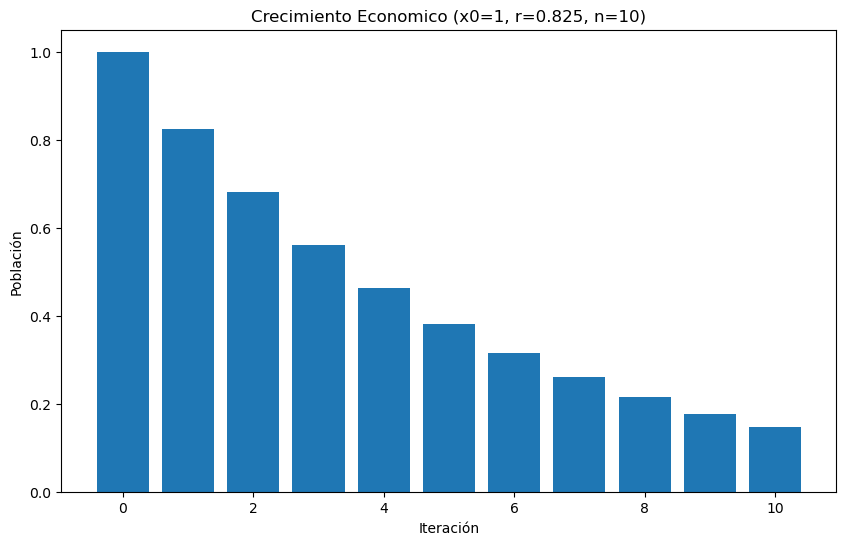


1.0 0.825 0.6806249999999999 0.561515625 0.4632503906249999 
0.3821815722656249 0.3152997971191405 0.26012233262329093 0.214600924414215 0.17704576264172736 
0.14606275417942507 

In [329]:
# Vida media 5780 años
x0 = 1
r = 0.825
n = 10

graficar_modelo_malthus(x0, r, n)
# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")

In [330]:
# Vida media 5780 años
x0 = 1000
r = 0.825
n = 1

# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")


1000.0 825.0 

## Ejercicio 5 (Hospital) ##

In [331]:
x0 = 20
# raiz septima de 2
r = 1/(2 ** (1/7))
n = 7

# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")


20.0 18.114473285278134 16.40670712015276 14.859942891369487 13.459001926323564 
12.190136542044758 11.040895136738127 10.000000000000002 

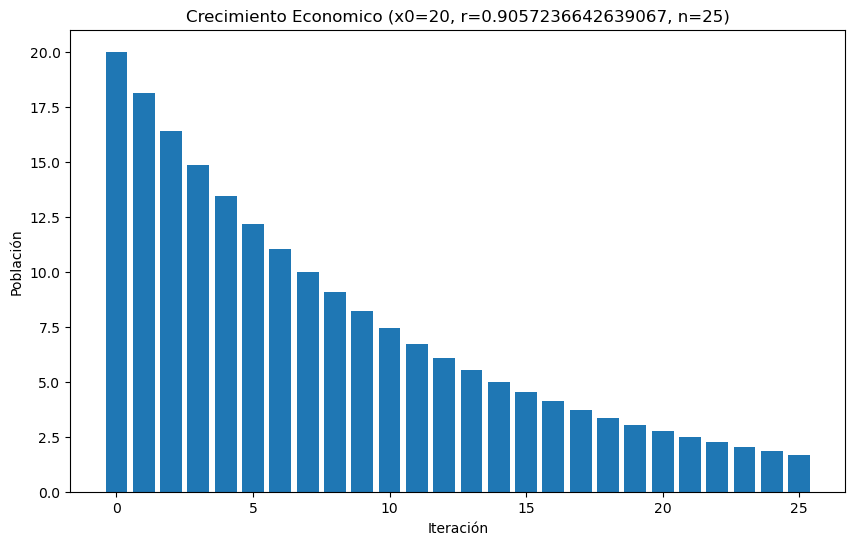


20.0 18.114473285278134 16.40670712015276 14.859942891369487 13.459001926323564 
12.190136542044758 11.040895136738127 10.000000000000002 9.05723664263907 8.203353560076383 
7.429971445684745 6.729500963161784 6.09506827102238 5.520447568369065 5.0000000000000036 
4.528618321319536 4.101676780038193 3.714985722842374 3.3647504815808933 3.0475341355111913 
2.760223784184533 2.500000000000002 2.264309160659769 2.050838390019097 1.8574928614211874 
1.682375240790447 

In [332]:
x0 = 20
# raiz septima de 2
r = 1/(2 ** (1/7))
n = 25

graficar_modelo_malthus(x0, r, n)

# Cada 5 iteraciones se imprime un salto de linea
for i in range(n+1):
  if i % 5 == 0:
    print()
  print(modelo_malthus(x0, r, n)[i], end=" ")

## Ejercicio 6 (Apicultora de la Alpujarra) ##

# Tema 3 #

## Modelo de Samuelson ##

In [333]:
def generar_secuencia(alpha, beta, G, y0, y1, n):
    """
    Genera una secuencia modelada por la ecuación recursiva:
    y_{n+2} = alpha(1-beta)y_{n+1} - beta*alpha*y_n + G

    Parámetros:
    alpha (float): Parámetro alpha de la ecuación.
    beta (float): Parámetro beta de la ecuación.
    G (float): Término constante en la ecuación.
    y0 (float): Condición inicial para y_0.
    y1 (float): Condición inicial para y_1.
    n (int): Número de términos de la secuencia a generar.

    Devuelve:
    list: Lista conteniendo los n primeros términos de la secuencia.
    """
    # Lista para almacenar la secuencia, inicializada con los dos primeros términos
    y = [y0, y1]
    
    # Generar la secuencia hasta n términos
    for i in range(2, n):
        # Aplicar la ecuación de recurrencia para calcular y_n+2
        yn2 = alpha * (1 + beta) * y[i-1] - beta * alpha * y[i-2] + G
        # Agregar el nuevo término a la lista
        y.append(yn2)
    
    return y

In [334]:
def generar_secuencia2(alpha, beta, G, y0, y1, n, a):
    """
    Genera una secuencia modelada por la ecuación recursiva:
    y_{n+2} = alpha(1-beta)y_{n+1} - beta*alpha*y_n + G

    Parámetros:
    alpha (float): Parámetro alpha de la ecuación.
    beta (float): Parámetro beta de la ecuación.
    G (float): Término constante en la ecuación.
    y0 (float): Condición inicial para y_0.
    y1 (float): Condición inicial para y_1.
    n (int): Número de términos de la secuencia a generar.

    Devuelve:
    list: Lista conteniendo los n primeros términos de la secuencia.
    """
    # Lista para almacenar la secuencia, inicializada con los dos primeros términos
    y = [y0, y1]
    
    # Generar la secuencia hasta n términos
    for i in range(2, n):
        # Aplicar la ecuación de recurrencia para calcular y_n+2
        yn2 = alpha * (1 + beta) * y[i-1] - beta * alpha * y[i-2] + G
        # Agregar el nuevo término a la lista
        y.append(yn2)
    
    return y

In [335]:
# Ejemplo de uso de la función con 0<alpha<1 y beta<1/alpha
alpha = 0.5
beta = 1.5
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = generar_secuencia(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia converge a un valor constante, el punto de equilibrio, Ye=G/(1-alpha)

[500, 6000, 7127.0, 4410.75, 170.1875]
[-3093.328125, -3992.30078125, -2668.3798828125, -339.249267578125, 1579.2233276367188]
[2230.466110229492, 1605.6651420593262, 336.2318449020386, -781.9590504169464, -1227.622696697712]
[-946.0590830594301, -259.8568313010037, 386.723273168318, 680.2967149361502, 562.3284387939493]
[194.68801229032397, -176.38631373255703, -364.49890138343926, -321.3338914298813, -126.29318824977219]
[85.13393326019576, 203.13730776257384, 192.0711847580705, 89.73600012565777, -29.883388411480652]
[-102.65623560859414, -103.9077532021322, -50.89251479621964, 16.315171406324595, 60.563350355070476]
[65.46780938909464, 38.41224897006545, 0.9144541707608269, -25.66611901409805, -30.768489395693187]
[-17.21102248404295, 3.5625889417162, 19.36150304017746, 23.529937093934677, 16.891294087285253]
[5.466664788655557, -3.835139579644494, -6.893923066047286, -3.741049147825737, 2.494130864753293]
[7.923450441810919, 10.03371490369868, 8.599555798265161, 5.22415857005744, 

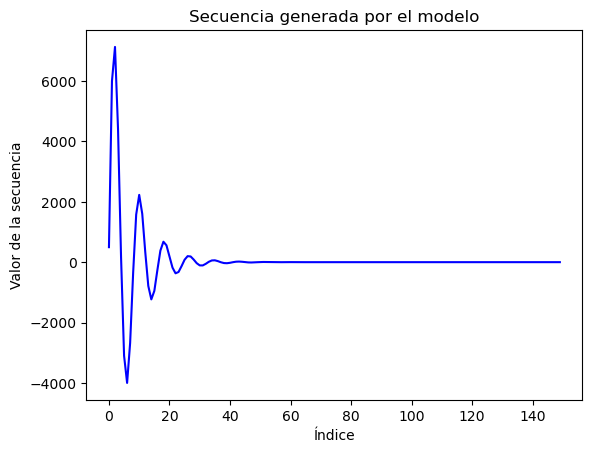

In [336]:
plt.plot(range(len(secuencia)), secuencia, color='blue')
plt.xlabel('Índice')
plt.ylabel('Valor de la secuencia')
plt.title('Secuencia generada por el modelo')
plt.show()

In [337]:
# Ejemplo de uso de la función con alpha, beta>=1
alpha = 1.5
beta = 1.5
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = generar_secuencia(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia no converge

[500, 6000, 21377.0, 66665.75, 201900.3125]
[607130.234375, 1822464.67578125, 5468201.5068359375, 16405212.130126953, 49216094.097595215]
[147648627.5731964, 442946143.6798973, 1328838628.759923, 3986516036.5699425, 11959548224.427456]
[35878644761.32059, 107635934351.99043, 322907803108.9928, 968723409368.7444, 2906170228139.5576]
[8718510684445.667, 26155532053359.246, 78466596160096.42, 235399788480305.25, 706199365440929.8]
[2118598096322801.8, 6355794288968417.0, 1.9067382866905264e+16, 5.72021486007158e+16, 1.716064458021474e+17]
[5.148193374064422e+17, 1.5444580122193265e+18, 4.633374036657979e+18, 1.3900122109973938e+19, 4.1700366329921815e+19]
[1.2510109898976544e+20, 3.753032969692963e+20, 1.1259098909078888e+21, 3.3777296727236663e+21, 1.0133189018171e+22]
[3.0399567054513e+22, 9.1198701163539e+22, 2.73596103490617e+23, 8.20788310471851e+23, 2.462364931415553e+24]
[7.387094794246659e+24, 2.216128438273998e+25, 6.648385314821994e+25, 1.994515594446598e+26, 5.983546783339794e+

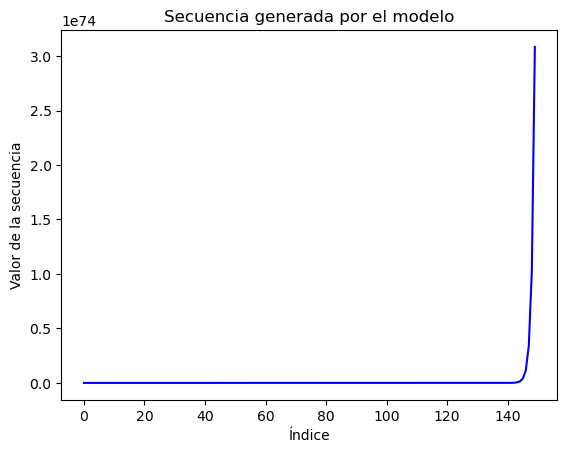

In [338]:
plt.plot(range(len(secuencia)), secuencia, color='blue')
plt.xlabel('Índice')
plt.ylabel('Valor de la secuencia')
plt.title('Secuencia generada por el modelo')
plt.show()

In [339]:
# Ejemplo de uso de la función con alpha, beta>=1
alpha = 0.5
beta = 3
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = generar_secuencia(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia no converge, es decir, el punto fijo Ye=G/(1-alpha) no es atractor (inestable)

[500, 6000, 11252.0, 13506.0, 10136.0]
[15.0, -15172.0, -30364.5, -37969.0, -30389.25]
[-3823.0, 37939.875, 81616.25, 106324.6875, 90227.0]
[20968.96875, -93400.5625, -218252.578125, -296402.3125, -265423.7578125]
[-86242.046875, 225653.54296875, 580672.15625, 822865.998046875, 774725.76171875]
[315154.5263671875, -531777.58984375, -1536284.9692382812, -2274901.5537109375, -2245373.653564453]
[-1078392.9765625, 1211276.5272216797, 4040144.5192871094, 6263376.247741699, 6466537.716552734]
[3538013.06149292, -2623778.4518432617, -10554574.495925903, -17173479.314086914, -18515094.884284973]
[-11269968.797439575, 5232706.731548309, 27370368.65925598, 46891679.2211895, 52727807.453495026]
[35118098.0752058, -8855513.029830933, -70388171.17247057, -127493070.80019474, -149403882.84168363]
[-107568157.48307514, 8969511.296375155, 179291260.81736302, 345128256.6901633, 421319624.1542821]
[324946865.27331924, 17914296.31521535, -451591703.27954817, -930054849.0319194, -1182722141.1445165]
[-97

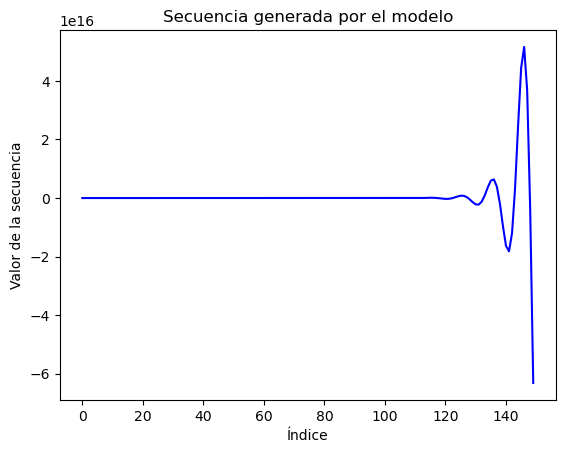

In [340]:
plt.plot(range(len(secuencia)), secuencia, color='blue')
plt.xlabel('Índice')
plt.ylabel('Valor de la secuencia')
plt.title('Secuencia generada por el modelo')
plt.show()

In [341]:
# Ejemplo de uso de la función con 0<alpha<1 y beta>1/alpha
alpha = 0.5
beta = 2.5
G = 2
y0 = 500
y1 = 6000
n = 150

secuencia = generar_secuencia(alpha, beta, G, y0, y1, n)
# Imprimir los resultados cada 5 valores en líneas distintas
for i in range(0, len(secuencia), 5):
    print(secuencia[i:i+5])

# Podemos ver que con los valores dados, la secuencia no converge

[500, 6000, 9877.0, 9786.75, 4782.5625]
[-3861.953125, -12734.62109375, -17456.1455078125, -14627.978271484375, -3776.7800903320312]
[11677.607681274414, 25158.788555145264, 29432.870369911194, 20061.03745341301, -1682.2724189162254]
[-28018.273549869657, -46927.13818862662, -47097.64989275951, -23759.96457654587, 17294.124356994114]
[59966.67334542204, 83326.02290824593, 70864.19840765283, 19856.818578085047, -53828.81549791721]
[-119019.45034396142, -140996.01872953598, -97966.7198467362, 4805.263680131611, 130869.61124865056]
[223017.24008497395, 226695.15608789123, 117946.97304759221, -76959.74227657769, -282111.2652935012]
[-397493.03641790495, -342971.7321144572, -103332.23567791888, 247885.2527067134, 562966.486834147]
[675336.7860763655, 478133.267090956, -7435.765186283854, -610677.1729396917, -1059388.3461616056]
[-1090581.139608195, -584279.5616123343, 340739.19168865867, 1326645.0374705705, 1895706.8259626753]
[1659182.6485964684, 533938.1025904752, -1139584.6312122538, -26

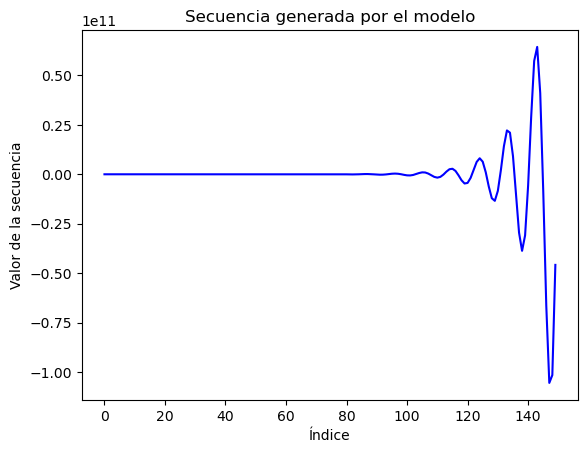

In [342]:
plt.plot(range(len(secuencia)), secuencia, color='blue')
plt.xlabel('Índice')
plt.ylabel('Valor de la secuencia')
plt.title('Secuencia generada por el modelo')
plt.show()